In [387]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode
import random
from scipy.stats import norm

temp1 = np.loadtxt('pendulo1.csv', delimiter=',', skiprows=1, unpack=True)[1]

In [388]:
def stats(val):
    maximo = max(val)
    minimo = min(val)
    moda = mode(val)
    mediana = np.median(val)
    media = np.mean(val)
    desv = np.std(val)
    print("Máximo: " + str(maximo) + "\nMínimo: " + str(minimo) + "\nModa: " + str(moda) + "\nMediana: " + str(mediana) + "\nMedia: " + str(media) + "\nDesviación estandar: " + str(desv))
    return maximo,minimo,moda,mediana,media,desv

stats(temp1)

Máximo: 2.21
Mínimo: 1.7
Moda: 1.92
Mediana: 1.96
Media: 1.9598
Desviación estandar: 0.08964351621840812


(2.21, 1.7, 1.92, 1.96, 1.9598, 0.08964351621840812)

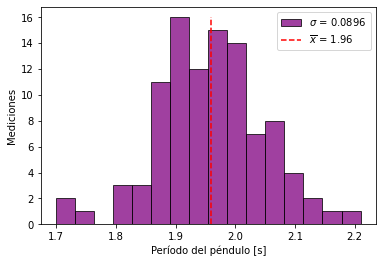

(array([0.02, 0.01, 0.  , 0.03, 0.03, 0.11, 0.16, 0.12, 0.15, 0.14, 0.07,
        0.08, 0.04, 0.02, 0.01, 0.01]),
 array([1.7     , 1.731875, 1.76375 , 1.795625, 1.8275  , 1.859375,
        1.89125 , 1.923125, 1.955   , 1.986875, 2.01875 , 2.050625,
        2.0825  , 2.114375, 2.14625 , 2.178125, 2.21    ]),
 <BarContainer object of 16 artists>)

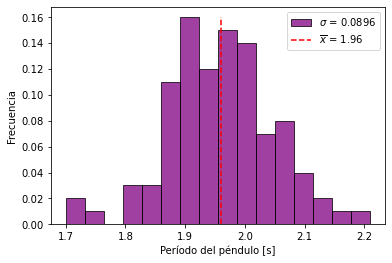

In [389]:
def sturges(N): return round(1+3.322*np.log(N))

def hist_n(val):
    k = sturges(len(val))
    plt.xlabel("Período del péndulo [s]")
    plt.ylabel("Mediciones")
    n,bins,patches = plt.hist(val,bins=k,edgecolor="black",facecolor="purple",alpha=0.75,label="$\sigma$ = " + str(np.round(np.std(val),4)))
    plt.vlines(np.mean(val),0,max(n),'r',linestyles="dashed",label="$\overline{x}$ = " + str(np.round(np.mean(val),2)))
    plt.legend()
    return n,bins,patches

def hist_freq(val):
    k = sturges(len(val))
    plt.xlabel("Período del péndulo [s]")
    plt.ylabel("Frecuencia")
    n,bins,patches = plt.hist(val,bins=k,edgecolor="black",facecolor="purple",alpha=0.75,label="$\sigma$ = " + str(np.round(np.std(val),4)),weights=np.ones_like(val)/len(val))
    plt.vlines(np.mean(val),0,max(n),'r',linestyles="dashed",label="$\overline{x}$ = " + str(np.round(np.mean(val),2)))
    plt.legend()
    plt.savefig("hist_freq.png")
    return n,bins,patches

hist_n(temp1)
plt.show()
hist_freq(temp1)

In [390]:
random.seed(4)
temp2 = list(np.loadtxt('pendulo2.csv', delimiter=',', skiprows=1, unpack=True)[1])
random.shuffle(temp2)

random.seed(3)
for i in range(300):
    temp2.append(random.sample(temp2,300)[i])
temp_g = []
for i in range(10):
    temp_g.append([])
    for j in range(int(len(temp2)/10)):
        temp_g[i].append(temp2[i*int(len(temp2)/10)+j])
media = []
sigma = []
for i in range(len(temp_g)):
    sigma.append(np.std(temp_g[i]))
    media.append(np.mean(temp_g[i]))
print(sigma)
print(abs(min(sigma)-max(sigma)))
print(media)

[0.0856478578573659, 0.09287072855438476, 0.099583995813696, 0.10567389565177497, 0.09980801014392021, 0.08551737965011687, 0.09504151139838259, 0.09193657233839714, 0.08962824455617893, 0.0984088692931463]
0.020156516001658104
[1.9466666666666668, 1.9468333333333334, 1.9638333333333335, 1.9311666666666667, 1.9468333333333332, 1.9396666666666669, 1.9493333333333334, 1.9390000000000003, 1.9436666666666664, 1.9308333333333334]


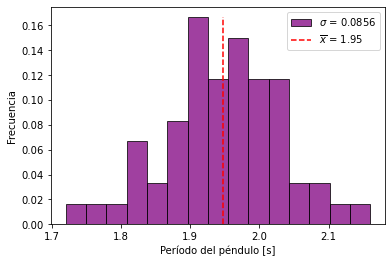

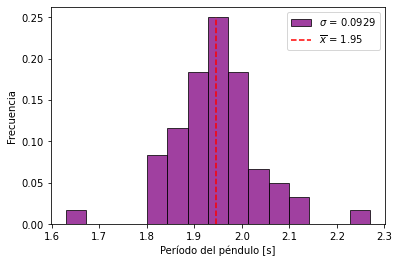

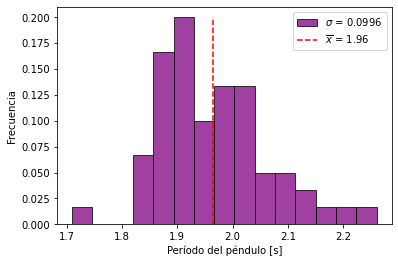

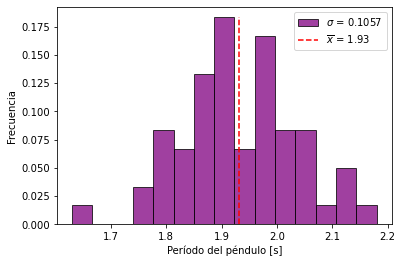

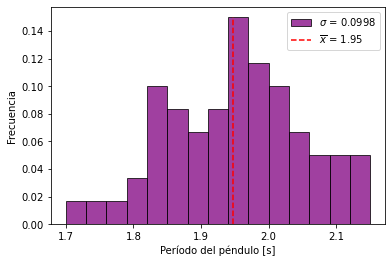

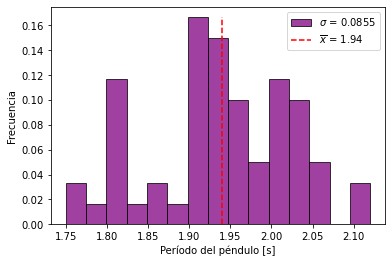

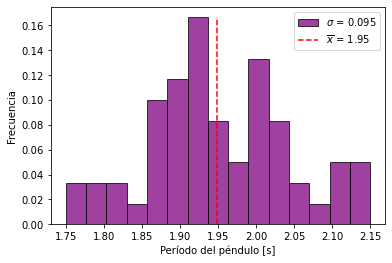

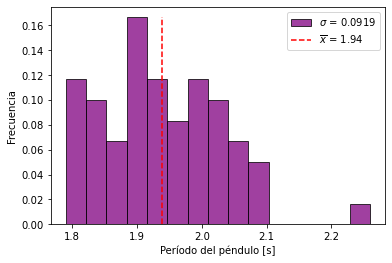

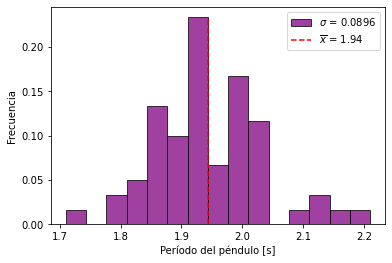

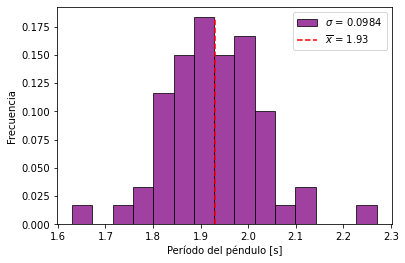

In [391]:
for i in range(len(temp_g)):
    hist_freq(temp_g[i])
    plt.show()

# Elijo el sexto

0.3700000000000001
0.024666666666666674


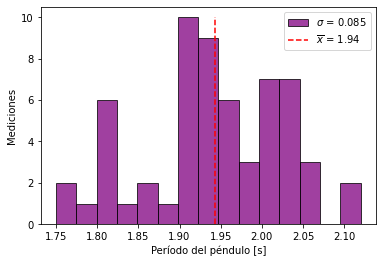

-68.82594594594592


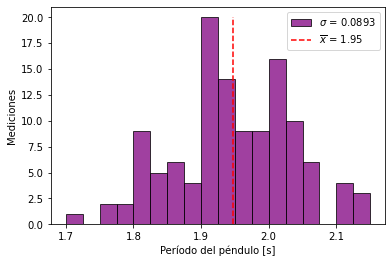

-66.76891891891889


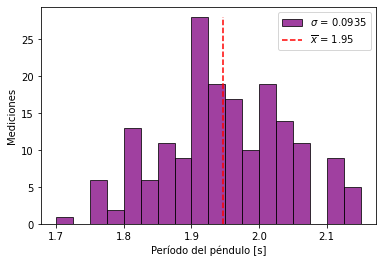

-66.76891891891889


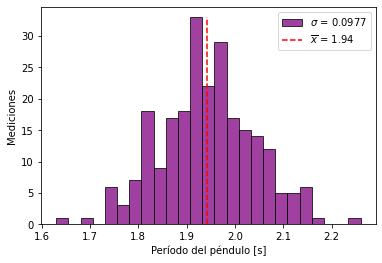

-63.821081081081054


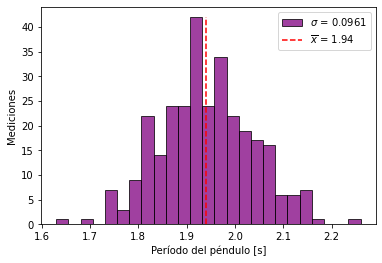

-63.821081081081054


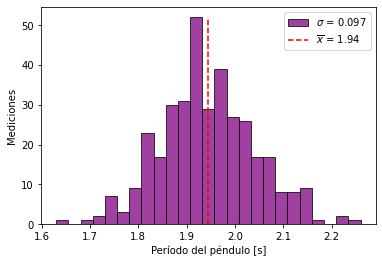

-63.821081081081054


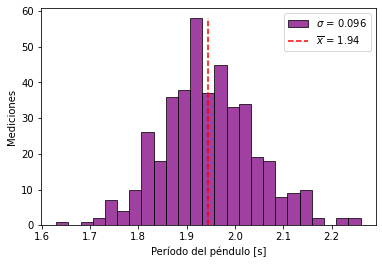

-63.821081081081054


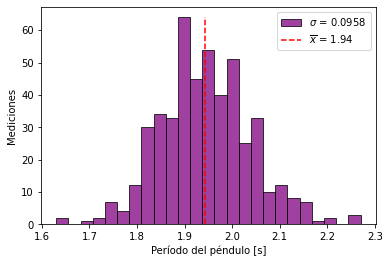

-63.81108108108105


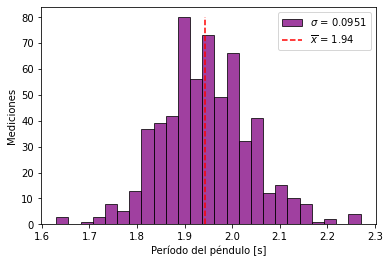

-63.81108108108105


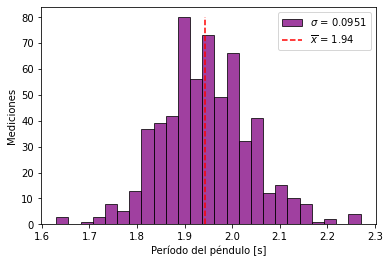

-63.81108108108105


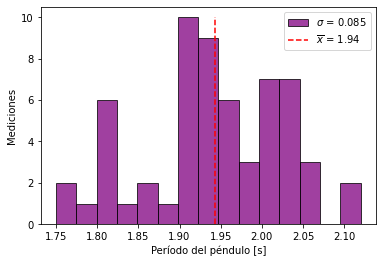

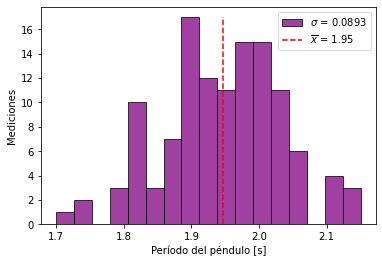

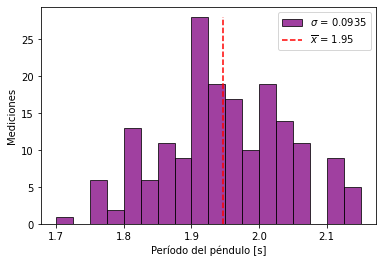

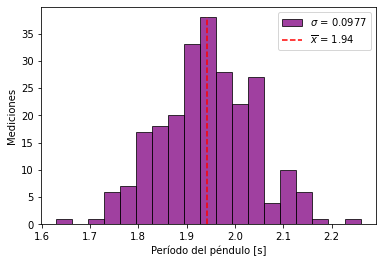

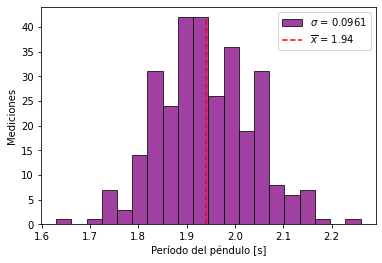

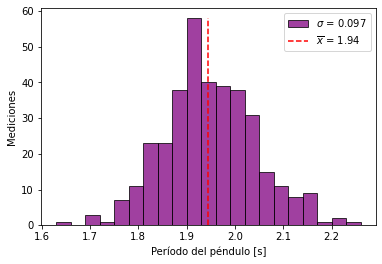

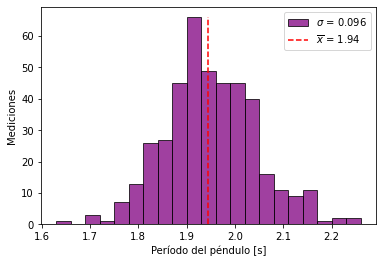

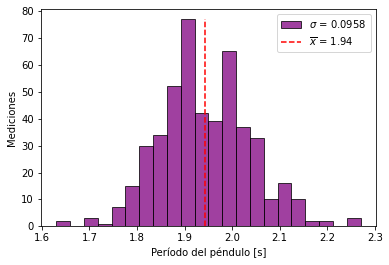

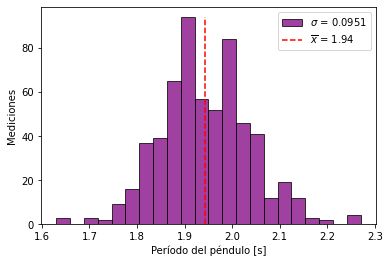

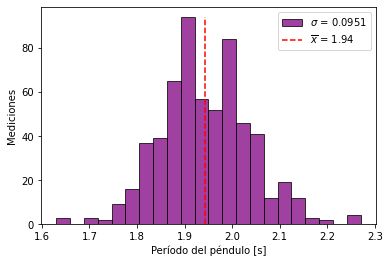

In [392]:
div = int(len(temp2)/10)
min_el = 5*div+1
max_el = 6*div+1

temp_cortes = []
for i in range(10):
    if max_el+div/2*i > len(temp2):
        temp_cortes.append(temp2)
    else:
        temp_cortes.append([temp2[i] for i in range(int(min_el-div/2*i),int(max_el+div/2*i))])

def hist_same_bin(cortes):
    orig = (max(cortes[0])-min(cortes[0]))/sturges(len(cortes[0]))
    print(max(cortes[0])-min(cortes[0]))
    print(orig)
    for i in range(len(cortes)):
        n,bins,patches = plt.hist(cortes[i],bins=int((max(cortes[i])-min(cortes[i]))/orig),edgecolor="black",facecolor="purple",alpha=0.75,label="$\sigma$ = " + str(np.round(np.std(cortes[i]),4)))
        plt.xlabel("Período del péndulo [s]")
        plt.ylabel("Mediciones")
        plt.vlines(np.mean(cortes[i]),0,max(n),'r',linestyles="dashed",label="$\overline{x}$ = " + str(np.round(np.mean(cortes[i]),2)))
        plt.legend()
        plt.show()
        print(max(cortes[i])-min(cortes[i])/orig)

hist_same_bin(temp_cortes)
for i in range(len(temp_cortes)):
    hist_n(temp_cortes[i])
    plt.show()

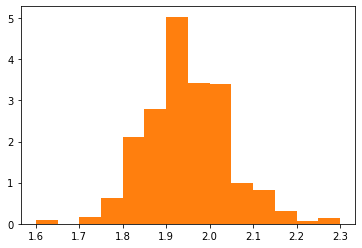

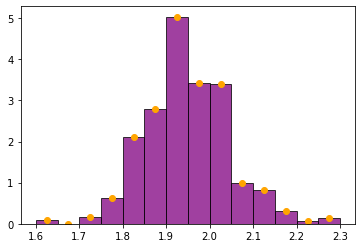

In [393]:
hist_data = [plt.hist(temp_cortes[-1],bins=14,range=[1.6,2.3],density=True)[1],plt.hist(temp_cortes[-1],bins=14,range=[1.6,2.3],density=True)[0]]


x = []
for i in range(len(hist_data[1])):
    x.append((hist_data[0][i]+hist_data[0][i+1])/2)
y = hist_data[1]

plt.show()
plt.hist(temp_cortes[-1],bins=14,range=[1.6,2.3],edgecolor="black",facecolor="purple",alpha=0.75,label="$\sigma$ = " + str(np.round(np.std(temp_cortes[-1]),4)),density=True)
plt.plot(x,y,'o',color="orange")

1.9437833333333332
0.09505184404079467


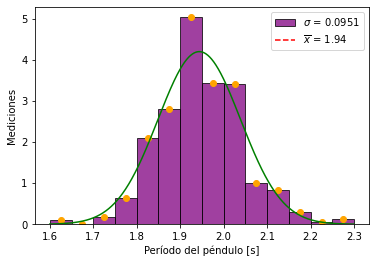

In [394]:
media_tot = np.mean(temp_cortes[-1])
sigma_tot = np.std(temp_cortes[-1])

print(media_tot)
print(sigma_tot)

plt.xlabel("Período del péndulo [s]")
plt.ylabel("Mediciones")
plt.hist(temp_cortes[-1],bins=14,range=[1.6,2.3],edgecolor="black",facecolor="purple",alpha=0.75,label="$\sigma$ = " + str(np.round(np.std(temp_cortes[-1]),4)),density=True)
plt.vlines(np.mean(temp_cortes[-1]),0,0,'r',linestyles="dashed",label="$\overline{x}$ = " + str(np.round(np.mean(temp_cortes[-1]),2)))
plt.legend()
x_aj = np.linspace(min(hist_data[0]),max(hist_data[0]),1000)
def y_ajuste(x): return np.e**-((x-media_tot)**2/(2*sigma_tot**2))/(sigma_tot*np.sqrt(2*np.pi))
y_aj = []
for i in range(len(x_aj)):
    y_aj.append(y_ajuste(x_aj[i]))
plt.plot(x,y,'o',color="orange")
plt.plot(x_aj,y_aj,color="green")
plt.savefig("gauss_600.png")

1.9499999999999997 0.20155644370746365


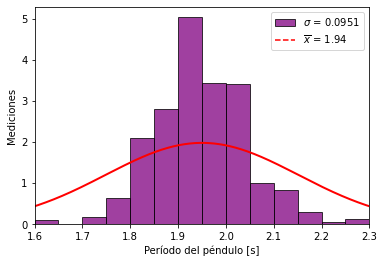

In [395]:
plt.xlabel("Período del péndulo [s]")
plt.ylabel("Mediciones")
plt.hist(temp_cortes[-1],bins=14,range=[1.6,2.3],edgecolor="black",facecolor="purple",alpha=0.75,label="$\sigma$ = " + str(np.round(np.std(temp_cortes[-1]),4)),density=True)
plt.vlines(np.mean(temp_cortes[-1]),0,0,'r',linestyles="dashed",label="$\overline{x}$ = " + str(np.round(np.mean(temp_cortes[-1]),2)))
plt.legend()
mu,sig = norm.fit(x)
print(mu,sig)
plt.xlim(1.6,2.3)
axis = np.linspace(norm.ppf(0.001,mu,sig),norm.ppf(0.999,mu,sig),1000)
x_pdf = norm.pdf(axis,mu,sig)
plt.plot(axis,x_pdf,'r-',linewidth=2)

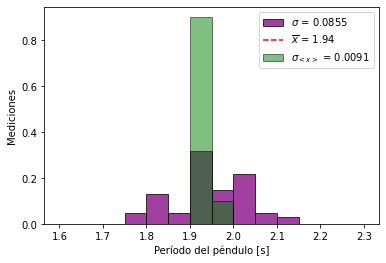

In [411]:
plt.xlabel("Período del péndulo [s]")
plt.ylabel("Mediciones")
plt.hist(temp_g[5],bins=14,range=[1.6,2.3],edgecolor="black",facecolor="purple",alpha=0.75,label="$\sigma$ = " + str(np.round(sigma[5],4)),weights=np.ones_like(temp_g[5])/len(temp_g[5]))
plt.vlines(np.mean(temp_cortes[-1]),0,0,'r',linestyles="dashed",label="$\overline{x}$ = " + str(np.round(np.mean(temp_cortes[-1]),2)))
plt.hist(media,bins=2,range=[1.9,2.0],edgecolor="black",facecolor="green",alpha=0.5,label="$\sigma_{<x>}$ = "+ str(np.round(np.std(media),4)),weights=np.ones_like(media)/len(media))
plt.legend()